<a href="https://colab.research.google.com/github/YuriiKlim/AI/blob/Lessom7/HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import joblib
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [78]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/House_Rent_Dataset.csv", index_col="Unnamed: 0")

[Інформація про дані](https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset)

In [79]:
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2.0,10000.0,1100.0,Ground out of 2,NaN,NaN,Kolkata,Unfurnished,Bachelors/Family,2.0,Contact Owner
1,2022-05-13,2.0,20000.0,800.0,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1.0,NaN
2,2022-05-16,2.0,17000.0,1000.0,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
3,2022-07-04,2.0,10000.0,800.0,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1.0,Contact Owner
4,NaN,2.0,7500.0,850.0,1 out of 2,Carpet Area,NaN,Kolkata,Unfurnished,Bachelors,1.0,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,NaN,15000.0,1000.0,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2.0,Contact Owner
4742,2022-05-15,3.0,29000.0,2000.0,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3.0,Contact Owner
4743,2022-07-10,3.0,35000.0,1750.0,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3.0,Contact Agent
4744,2022-07-06,3.0,45000.0,1500.0,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2.0,Contact Agent


In [80]:
# df = df.drop(columns='Floor')
# df = df.drop(columns='Area Locality')
# df

# Завдання 1
Ввиведіть основні числові характеристики даних, розділіть на тренувальну та тестову чатини

In [81]:
df.describe(include=['number']).round(2)

,BHK,Rent,Size,Bathroom
count,4342.00,4369.00,4402.00,4387.00
mean,2.08,34613.06,967.21,1.97
std,0.83,77408.18,636.12,0.89
min,1.00,1200.00,10.00,1.00
25%,2.00,10000.00,550.00,1.00
50%,2.00,16000.00,850.00,2.00
75%,3.00,33000.00,1200.00,2.00
max,6.00,3500000.00,8000.00,10.00


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted On          4379 non-null   object 
 1   BHK                4342 non-null   float64
 2   Rent               4369 non-null   float64
 3   Size               4402 non-null   float64
 4   Floor              4380 non-null   object 
 5   Area Type          4390 non-null   object 
 6   Area Locality      4347 non-null   object 
 7   City               4388 non-null   object 
 8   Furnishing Status  4395 non-null   object 
 9   Tenant Preferred   4372 non-null   object 
 10  Bathroom           4387 non-null   float64
 11  Point of Contact   4372 non-null   object 
dtypes: float64(4), object(8)
memory usage: 482.0+ KB


In [83]:
df.isnull().sum()

Posted On            367
BHK                  404
Rent                 377
Size                 344
Floor                366
Area Type            356
Area Locality        399
City                 358
Furnishing Status    351
Tenant Preferred     374
Bathroom             359
Point of Contact     374
dtype: int64

In [84]:
X = df.drop(columns='Rent')
y = df['Rent']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 3796
Testing set size: 950


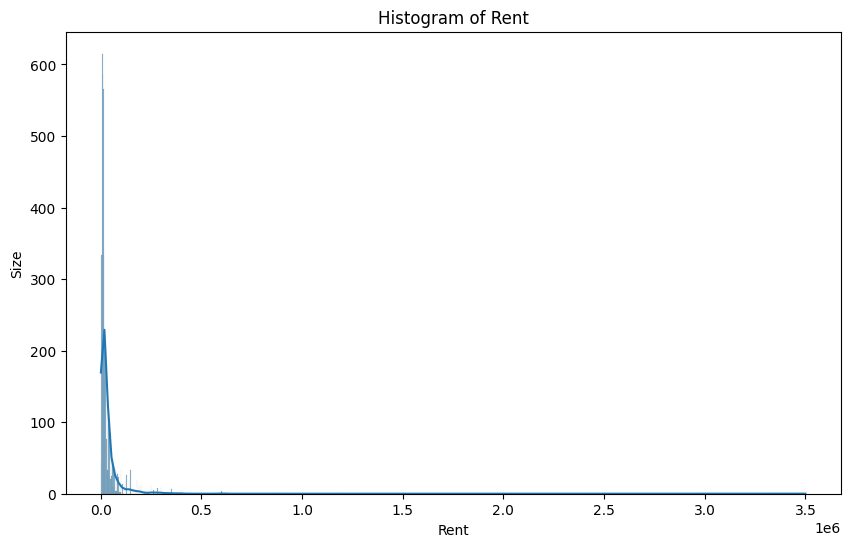

In [85]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rent'], kde=True)
plt.title(f'Histogram of Rent')
plt.xlabel('Rent')
plt.ylabel('Size')
plt.show()

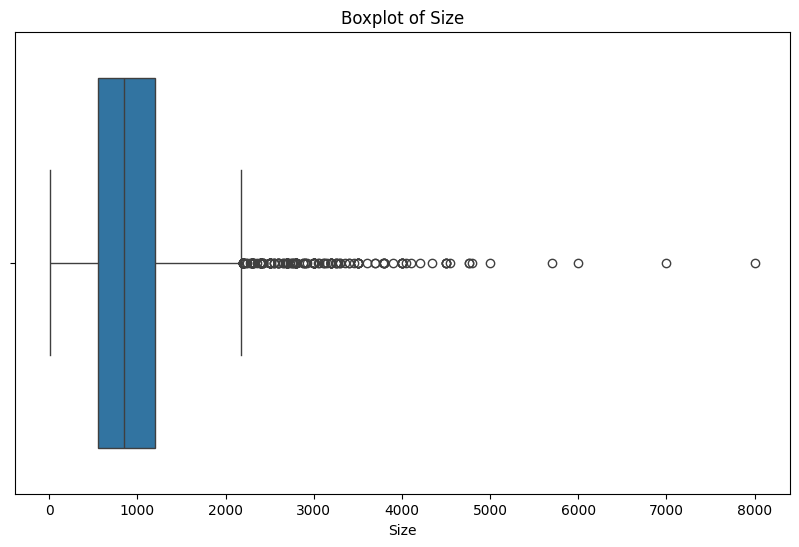

In [86]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Size'])
plt.title(f'Boxplot of Size')
plt.xlabel('Size')
plt.show()

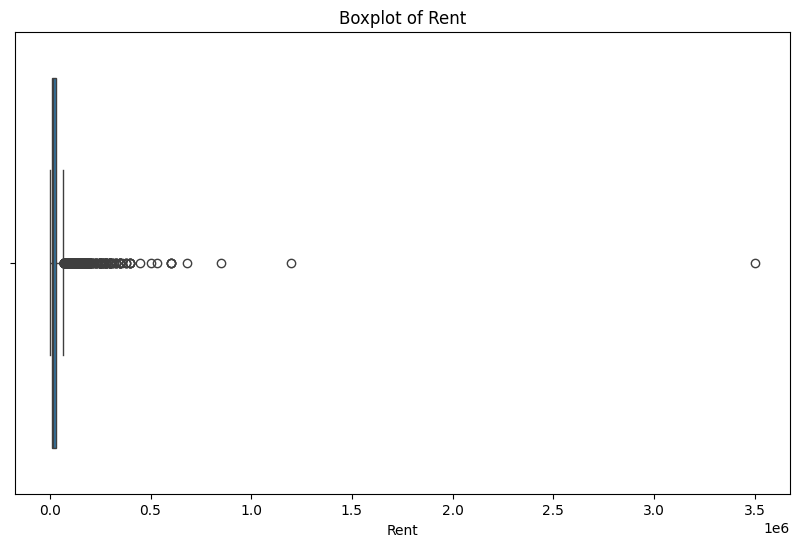

In [87]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Rent'])
plt.title(f'Boxplot of Rent')
plt.xlabel('Rent')
plt.show()

видалимо вручну аномально великі дані, їх краще розглядати індивідуально

In [88]:
df = df[df['Rent'] <= 1000000]

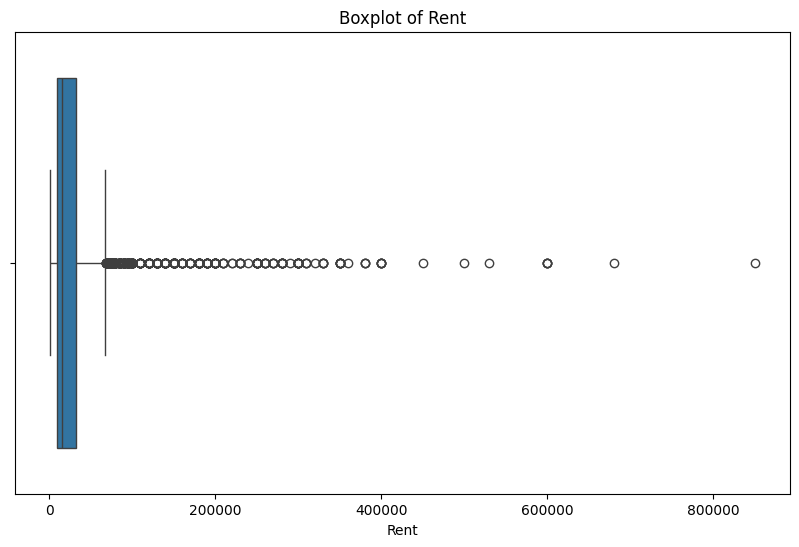

In [89]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Rent'])
plt.title(f'Boxplot of Rent')
plt.xlabel('Rent')
plt.show()

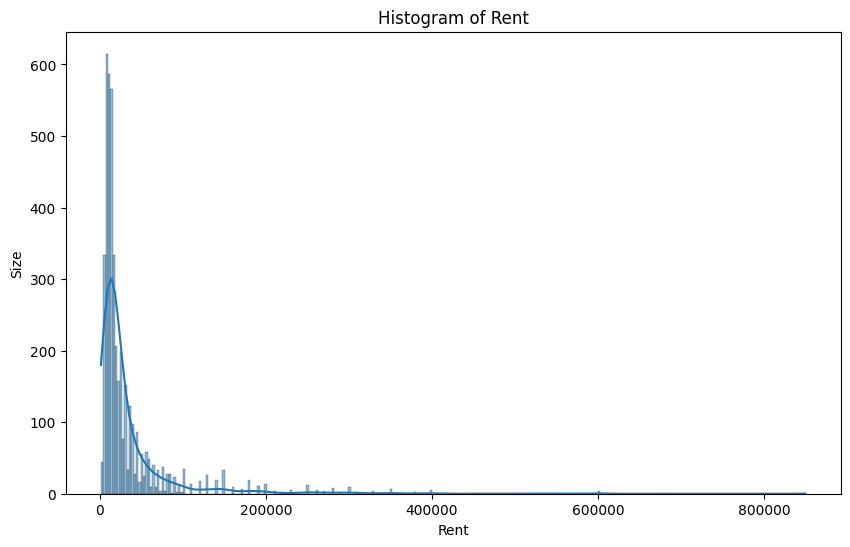

In [90]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rent'], kde=True)
plt.title(f'Histogram of Rent')
plt.xlabel('Rent')
plt.ylabel('Size')
plt.show()

In [91]:
df.describe(include=['number']).round(2)

,BHK,Rent,Size,Bathroom
count,3993.00,4367.00,4048.00,4035.00
mean,2.08,33552.66,965.63,1.97
std,0.83,54148.19,626.75,0.88
min,1.00,1200.00,10.00,1.00
25%,2.00,10000.00,550.00,1.00
50%,2.00,16000.00,850.00,2.00
75%,3.00,33000.00,1200.00,2.00
max,6.00,850000.00,7000.00,7.00


In [92]:
X = df.drop(columns='Rent')
y = df['Rent']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 3493
Testing set size: 874


# Завдання 2
Створіть Pipeline для обробки числових стовпчиків(заповнення пропусків)

In [93]:
numeric_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [94]:
numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())
])
numeric_transformer

Pipeline(steps=[('imputer', KNNImputer()), ('scaler', StandardScaler())])

# Завдання 3
Створіть Pipeline для обробки категоріальних стовпчиків(заповнення пропусків та кодування)

In [95]:
categorical_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="most_frequent")),
           ("encoder", OneHotEncoder(sparse_output=False, handle_unknown='infrequent_if_exist'))])
categorical_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder',
                 OneHotEncoder(handle_unknown='infrequent_if_exist',
                               sparse_output=False))])

# Завдання 4
Об'єднайте попередні Pipeline в один ColumnTransformer

In [96]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

preprocessor.set_output(transform='pandas')
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['BHK', 'Size', 'Bathroom'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                sparse_output=False))]),
                                 Index(['Posted On', 'Floor', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Point of Contact'],
      dtype='object'))])

In [97]:
preprocessor.fit(X_train)
preprocessor.transform(X_train)

,num__BHK,num__Size,num__Bathroom,cat__Posted On_2022-04-13,cat__Posted On_2022-04-23,cat__Posted On_2022-04-24,cat__Posted On_2022-04-25,cat__Posted On_2022-04-26,cat__Posted On_2022-04-27,cat__Posted On_2022-04-28,...,cat__City_Mumbai,cat__Furnishing Status_Furnished,cat__Furnishing Status_Semi-Furnished,cat__Furnishing Status_Unfurnished,cat__Tenant Preferred_Bachelors,cat__Tenant Preferred_Bachelors/Family,cat__Tenant Preferred_Family,cat__Point of Contact_Contact Agent,cat__Point of Contact_Contact Builder,cat__Point of Contact_Contact Owner
3126,-1.330616,-0.959712,-1.114287,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2256,-1.330616,-1.252434,-1.114287,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
738,-1.330616,-0.870979,0.052815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3621,-1.330616,-0.597576,-1.114287,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2753,-0.098605,-0.106434,0.052815,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3740,-0.098605,-0.042585,0.052815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
497,-0.098605,-0.433862,0.052815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3358,-0.098605,-0.104796,0.052815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4094,-0.098605,0.278295,0.052815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


# Завдання 5
Створіть остаточну модель та натренуйте її

In [98]:
model = Pipeline(
    [("prep", preprocessor),
     ("model", LinearRegression())
     ]
)

model

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['BHK', 'Size', 'Bathroom'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                                 sparse_output=False))]),
                                                  Index(['Posted On', 'Floor', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Point of Contact'],
      dtype='object'))])),
                ('model', LinearRegression())])

In [99]:
model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['BHK', 'Size', 'Bathroom'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                                 sparse_output=False))]),
                                                  Index(['Posted On', 'Floor', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Point of Contact'],
      dtype='object'))])),
                ('model', LinearRegression())])

In [107]:
y_pred = model.predict(X_test)

# Завдання 6
Виведіть основні метрики моделі

In [108]:
def get_metrics(y_true, y_pred, name='Value'):
    df = pd.DataFrame()
    df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
    df.loc["MPE", name] = metrics.mean_absolute_percentage_error(y_true, y_pred)
    df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
    df.loc["R2", name] = metrics.r2_score(y_true, y_pred)
    return df.round(2)

In [109]:
all_metrics = pd.DataFrame()

all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, y_pred)

In [110]:
all_metrics

,train,test
MAE,6104.45,8.054290e+14
MPE,0.36,3.217648e+10
RMSE,13731.94,1.019683e+16
R2,0.93,-2.549180e+22


# Завдання 7
Збережіть модель, завантажте її та спрогнозуйте ціну автомобіля

In [104]:
data = pd.DataFrame({'Size': [900],
                     'Furnishing Status': ['Semi-Furnished'],
                     'City': ['Mumbai']})

data

,Size,Furnishing Status,City
0,900,Semi-Furnished,Mumbai


In [105]:
#model.predict(data)